In [93]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
from ast import literal_eval

# Veri setini yükleyelim
file_path = "movies_metadata.csv"  # Veri dosyanızın doğru yolunu yazın
movies = pd.read_csv(file_path, low_memory=False)

# Veri setinin ilk bilgilerini kontrol edelim
print("Veri setinin boyutları:", movies.shape)
print("\nİlk 5 satır:")
print(movies.head())


Veri setinin boyutları: (45466, 24)

İlk 5 satır:
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1               

In [94]:
# Eksik verileri kontrol et
missing_values = movies.isnull().sum()

print("Her bir sütundaki eksik değer sayısı:")
print(missing_values)


Her bir sütundaki eksik değer sayısı:
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [95]:
# Analiz için kritik olmayan sütunları çıkaralım
movies_cleaned = movies.drop(columns=["belongs_to_collection", "homepage", "tagline"])

# Eksik değerleri dolduralım veya çıkaralım
# runtime sütunundaki eksik değerleri medyan ile dolduralım
movies_cleaned['runtime'].fillna(movies_cleaned['runtime'].median(), inplace=True)

# release_date sütunundaki eksik değerleri çıkaralım (örnek)
movies_cleaned = movies_cleaned[movies_cleaned['release_date'].notnull()]

# Kalan eksik değerleri tekrar kontrol edelim
missing_after_cleaning = movies_cleaned.isnull().sum()
print("Eksik veriler temizlendikten sonra:")
print(missing_after_cleaning)


Eksik veriler temizlendikten sonra:
adult                     0
budget                    0
genres                    0
id                        0
imdb_id                  14
original_language        11
original_title            0
overview                941
popularity                2
poster_path             339
production_companies      0
production_countries      0
release_date              0
revenue                   3
runtime                   0
spoken_languages          3
status                   83
title                     3
video                     3
vote_average              3
vote_count                3
dtype: int64


In [96]:
# 'popularity' sütununu sayısal değerlere dönüştür
movies_cleaned['popularity'] = pd.to_numeric(movies_cleaned['popularity'], errors='coerce')

# Sayısal değerlere dönüştürüldükten sonra eksik değerleri doldur
movies_cleaned['popularity'].fillna(movies_cleaned['popularity'].mean(), inplace=True)

# Diğer sütunlarla devam etmeden önce benzer işlemi uygula
movies_cleaned['vote_average'] = pd.to_numeric(movies_cleaned['vote_average'], errors='coerce')
movies_cleaned['vote_average'].fillna(movies_cleaned['vote_average'].mean(), inplace=True)

movies_cleaned['vote_count'] = pd.to_numeric(movies_cleaned['vote_count'], errors='coerce')
movies_cleaned['vote_count'].fillna(movies_cleaned['vote_count'].mean(), inplace=True)

# Temizlenen verinin kontrolü
print(movies_cleaned[['popularity', 'vote_average', 'vote_count']].head())


   popularity  vote_average  vote_count
0   21.946943           7.7      5415.0
1   17.015539           6.9      2413.0
2   11.712900           6.5        92.0
3    3.859495           6.1        34.0
4    8.387519           5.7       173.0


In [97]:
# Sınırsız değerleri NaN olarak işaretle
movies_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN olan değerleri sütunun ortalama değeriyle doldur
for column in ['popularity', 'vote_average', 'vote_count']:
    movies_cleaned[column].fillna(movies_cleaned[column].mean(), inplace=True)

# Temizlenen verinin kontrolü
print("Sınırsız değerler ve NaN değerler temizlendikten sonra:")
print(movies_cleaned[['popularity', 'vote_average', 'vote_count']].describe())


Sınırsız değerler ve NaN değerler temizlendikten sonra:
         popularity  vote_average    vote_count
count  45379.000000  45379.000000  45379.000000
mean       2.926458      5.624070    110.096439
std        6.009473      1.915359    491.726639
min        0.000000      0.000000      0.000000
25%        0.388855      5.000000      3.000000
50%        1.130550      6.000000     10.000000
75%        3.690686      6.800000     34.000000
max      547.488298     10.000000  14075.000000


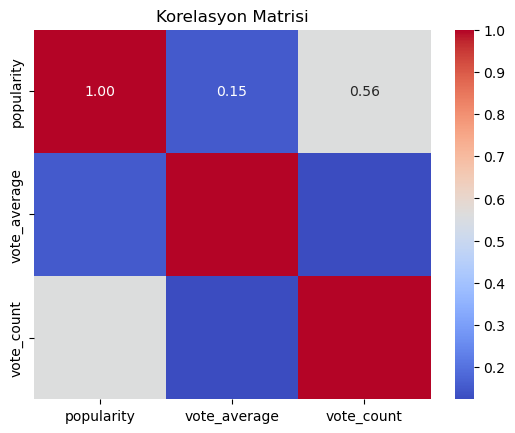

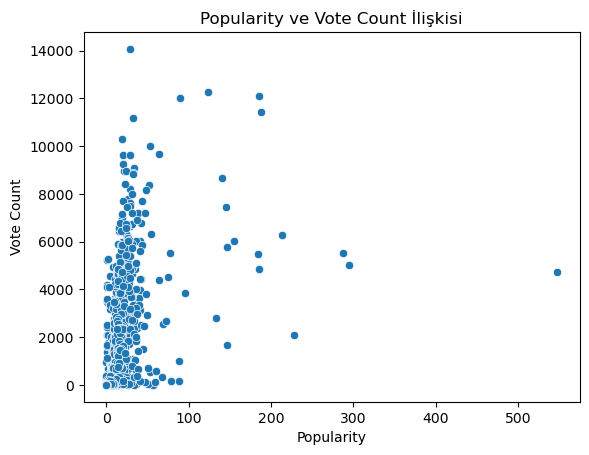

In [98]:
# Korelasyon matrisi
correlation_matrix = movies_cleaned[['popularity', 'vote_average', 'vote_count']].corr()

# Isı haritası
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

# Popularity ve vote_count dağılımı
sns.scatterplot(data=movies_cleaned, x='popularity', y='vote_count')
plt.title("Popularity ve Vote Count İlişkisi")
plt.xlabel("Popularity")
plt.ylabel("Vote Count")
plt.show()


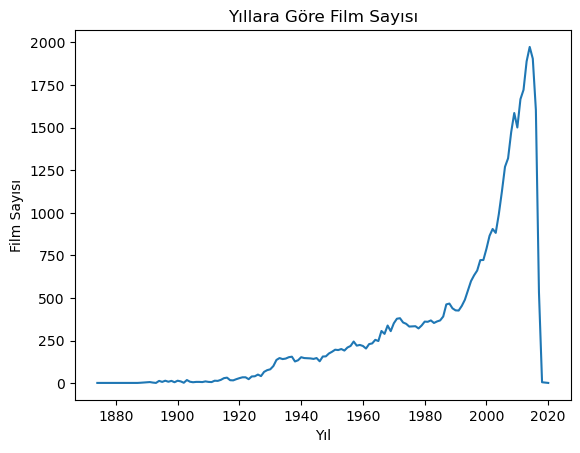

In [99]:
# 'release_date' sütununu temizleyip NaT ile hatalı değerleri işaretle
movies_cleaned['release_date'] = pd.to_datetime(movies_cleaned['release_date'], errors='coerce')

# 'release_year' sütununu oluştur
movies_cleaned['release_year'] = movies_cleaned['release_date'].dt.year

# Yıllık film sayısını hesapla
yearly_counts = movies_cleaned['release_year'].value_counts().sort_index()

# Yıllık film sayısını görselleştir
plt.plot(yearly_counts.index, yearly_counts.values)
plt.title("Yıllara Göre Film Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Film Sayısı")
plt.show()


In [100]:
top_popular_movies = movies_cleaned.sort_values(by='popularity', ascending=False).head(10)
print("En Popüler 10 Film:")
print(top_popular_movies[['title', 'popularity', 'vote_average']])


En Popüler 10 Film:
                                title  popularity  vote_average
30700                         Minions  547.488298           6.4
33356                    Wonder Woman  294.337037           7.2
42222            Beauty and the Beast  287.253654           6.8
43644                     Baby Driver  228.032744           7.2
24455                      Big Hero 6  213.849907           7.8
26564                        Deadpool  187.860492           7.4
26566  Guardians of the Galaxy Vol. 2  185.330992           7.6
14551                          Avatar  185.070892           7.2
24351                       John Wick  183.870374           7.0
23675                       Gone Girl  154.801009           7.9


In [101]:

# 2. Türlerin (Genres) İşlenmesi
# JSON formatındaki 'genres' sütununu çözüyoruz
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# 3. Yıl Bilgisinin Eklenmesi
# 'release_date' sütunundan yıl bilgisi çıkarıyoruz
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(
    lambda x: str(x).split('-')[0] if pd.notnull(x) else np.nan)

# 4. İlk 5 Satırı Görüntüleme
print(movies[['title', 'genres', 'year']].head())

                         title                        genres  year
0                    Toy Story   [Animation, Comedy, Family]  1995
1                      Jumanji  [Adventure, Fantasy, Family]  1995
2             Grumpier Old Men             [Romance, Comedy]  1995
3            Waiting to Exhale      [Comedy, Drama, Romance]  1995
4  Father of the Bride Part II                      [Comedy]  1995


In [102]:
# 1. Oy Sayısı ve Ortalama Oy Hesaplama
vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('float')

# Ortalama puan (C) ve minimum oy sayısı (m)
C = vote_averages.mean()
m = vote_counts.quantile(0.95)

# 2. Nitelikli Filmleri Seçme
# Sadece yeterli oyu olan filmlerle çalışacağız
qualified = movies[(movies['vote_count'] >= m) & (movies['vote_average'].notnull())]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('float')

# 3. Ağırlıklı Derecelendirme Fonksiyonu
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

qualified['wr'] = qualified.apply(weighted_rating, axis=1)

# 4. Filmleri Sıralama ve İlk 10'u Görüntüleme
qualified = qualified.sort_values('wr', ascending=False)
print(qualified[['title', 'year', 'vote_count', 'vote_average', 'wr']].head(10))


                          title  year  vote_count  vote_average        wr
314    The Shawshank Redemption  1994        8358           8.5  8.357746
834               The Godfather  1972        6024           8.5  8.306334
12481           The Dark Knight  2008       12269           8.3  8.208376
2843                 Fight Club  1999        9678           8.3  8.184899
292                Pulp Fiction  1994        8670           8.3  8.172155
351                Forrest Gump  1994        8147           8.2  8.069421
522            Schindler's List  1993        4436           8.3  8.061007
23673                  Whiplash  2014        4376           8.3  8.058025
5481              Spirited Away  2001        3968           8.3  8.035598
1154    The Empire Strikes Back  1980        5998           8.2  8.025793


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# 1. Popüler Filmleri Seçme
# Sadece yeterli oyu olan filmleri seçiyoruz
popular_movies = movies[movies['vote_count'] >= 1000].reset_index()
popular_movies['description'] = popular_movies['overview'].fillna('')

# 2. TF-IDF Matrisini Oluşturma
tfidf = TfidfVectorizer(analyzer='word', stop_words='english', max_features=20000)
tfidf_matrix = tfidf.fit_transform(popular_movies['description'])

# 3. Nearest Neighbors Modeli ile Benzerlik Hesaplama
nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
nn.fit(tfidf_matrix)

# 4. Öneri Fonksiyonu
def get_recommendations(title, movies_df, nn_model, tfidf_matrix):
    # Filmin indeksini al
    try:
        idx = movies_df[movies_df['title'] == title].index[0]
    except IndexError:
        raise ValueError(f"'{title}' bulunamadı. Lütfen doğru bir başlık girin.")
    
    # En yakın komşuları bul
    distances, indices = nn_model.kneighbors(tfidf_matrix[idx], n_neighbors=10)
    
    # Benzer filmleri döndür
    recommended_movies = movies_df.iloc[indices[0]]
    return recommended_movies[['title', 'year', 'genres']]

# Örnek Çalıştırma
print(get_recommendations('The Godfather', popular_movies, nn, tfidf_matrix))
print(get_recommendations('The Dark Knight', popular_movies, nn, tfidf_matrix))


                        title  year                       genres
59              The Godfather  1972               [Drama, Crime]
97     The Godfather: Part II  1974               [Drama, Crime]
161   The Godfather: Part III  1990     [Crime, Drama, Thriller]
748                  Sinister  2012  [Horror, Thriller, Mystery]
293         Road to Perdition  2002     [Thriller, Crime, Drama]
1085                     Lion  2016                      [Drama]
179         Life Is Beautiful  1997              [Comedy, Drama]
586            The Blind Side  2009                      [Drama]
1032        Nocturnal Animals  2016            [Drama, Thriller]
973                 Furious 7  2015                     [Action]
                                   title  year  \
505                      The Dark Knight  2008   
700                The Dark Knight Rises  2012   
114                       Batman Returns  1992   
15                        Batman Forever  1995   
44                                B

In [104]:
def get_recommendations_with_filter(title, movies_df, nn_model, tfidf_matrix, genre_filter=None):
    # Filmin indeksini al
    try:
        idx = movies_df[movies_df['title'] == title].index[0]
    except IndexError:
        raise ValueError(f"'{title}' bulunamadı. Lütfen doğru bir başlık girin.")
    
    # En yakın komşuları bul
    distances, indices = nn_model.kneighbors(tfidf_matrix[idx], n_neighbors=10)
    
    # Benzer filmleri seç
    recommended_movies = movies_df.iloc[indices[0]].copy()
    
    # Tür Bazlı Filtreleme
    if genre_filter:
        recommended_movies = recommended_movies[
            recommended_movies['genres'].apply(lambda x: genre_filter in x)]
    
    # Ağırlıklı Derecelendirme ile Sıralama
    if 'wr' in recommended_movies.columns:
        recommended_movies = recommended_movies.sort_values('wr', ascending=False)
    
    return recommended_movies[['title', 'year', 'genres']]

# Örnek Çalıştırma
print(get_recommendations_with_filter('The Godfather', popular_movies, nn, tfidf_matrix, genre_filter='Drama'))
print(get_recommendations_with_filter('The Dark Knight', popular_movies, nn, tfidf_matrix, genre_filter='Action'))


                        title  year                    genres
59              The Godfather  1972            [Drama, Crime]
97     The Godfather: Part II  1974            [Drama, Crime]
161   The Godfather: Part III  1990  [Crime, Drama, Thriller]
293         Road to Perdition  2002  [Thriller, Crime, Drama]
1085                     Lion  2016                   [Drama]
179         Life Is Beautiful  1997           [Comedy, Drama]
586            The Blind Side  2009                   [Drama]
1032        Nocturnal Animals  2016         [Drama, Thriller]
                                   title  year  \
505                      The Dark Knight  2008   
700                The Dark Knight Rises  2012   
114                       Batman Returns  1992   
15                        Batman Forever  1995   
44                                Batman  1989   
396                        Batman Begins  2005   
1098               The Lego Batman Movie  2017   
702   Sherlock Holmes: A Game of Shadows  

In [105]:
# credits.csv dosyasını okuma
credits = pd.read_csv('credits.csv')

# İlk birkaç satırı ve veri yapısını görüntüleme
print("Dosyanın ilk 5 satırı:")
print(credits.head())

print("\nVeri tipleri ve eksik değer bilgisi:")
print(credits.info())


Dosyanın ilk 5 satırı:
                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  

Veri tipleri ve eksik değer bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    4

In [106]:
movies['id'] = movies['id'].apply(pd.to_numeric, errors='coerce')
credits['id'] = credits['id'].apply(pd.to_numeric, errors='coerce')

# 3. Veri Setlerini Birleştirme
# movies ve credits veri setlerini 'id' sütununa göre birleştiriyoruz
movies = movies.merge(credits, on='id')

# 4. Cast ve Crew Bilgilerini İşleme
movies['cast'] = movies['cast'].fillna('[]').apply(literal_eval).apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies['crew'] = movies['crew'].fillna('[]').apply(literal_eval).apply(
    lambda x: [i['name'] for i in x if i['job'] == 'Director'] if isinstance(x, list) else [])

# İlk 3 oyuncu ve yönetmen bilgilerini alıyoruz
movies['cast'] = movies['cast'].apply(lambda x: x[:3] if len(x) >= 3 else x)
movies['director'] = movies['crew'].apply(lambda x: x[:1] if len(x) >= 1 else x)

# 5. İşlenmiş Veriyi Kontrol Etme
print(movies[['title', 'cast', 'director']].head())

                         title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                                cast           director  
0                [Tom Hanks, Tim Allen, Don Rickles]    [John Lasseter]  
1     [Robin Williams, Jonathan Hyde, Kirsten Dunst]     [Joe Johnston]  
2         [Walter Matthau, Jack Lemmon, Ann-Margret]    [Howard Deutch]  
3  [Whitney Houston, Angela Bassett, Loretta Devine]  [Forest Whitaker]  
4         [Steve Martin, Diane Keaton, Martin Short]    [Charles Shyer]  


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# 1. 'Soup' Sütununu Oluşturma
movies['soup'] = movies['genres'] + movies['cast'] + movies['director']
movies['soup'] = movies['soup'].apply(lambda x: ' '.join(x).lower())

# 2. TF-IDF Matrisini Oluşturma
tfidf = TfidfVectorizer(analyzer='word', stop_words='english', max_features=46398)
tfidf_matrix = tfidf.fit_transform(movies['soup'])

# 3. Nearest Neighbors Modeli ile Benzerlik Hesaplama
nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
nn.fit(tfidf_matrix)

# 4. Öneri Fonksiyonu
def get_recommendations_with_soup(title, movies_df, nn_model, tfidf_matrix):
    try:
        idx = movies_df[movies_df['title'] == title].index[0]
    except IndexError:
        raise ValueError(f"'{title}' bulunamadı. Lütfen doğru bir başlık girin.")
    
    # En yakın komşuları bul
    distances, indices = nn_model.kneighbors(tfidf_matrix[idx], n_neighbors=10)
    recommended_movies = movies_df.iloc[indices[0]]
    return recommended_movies[['title', 'year', 'genres', 'cast', 'director']]

# Örnek Çalıştırma
print(get_recommendations_with_soup('Toy Story', movies, nn, tfidf_matrix))
print(get_recommendations_with_soup('Jumanji', movies, nn, tfidf_matrix))


                            title  year                                genres  \
0                       Toy Story  1995           [Animation, Comedy, Family]   
3008                  Toy Story 2  1999           [Animation, Comedy, Family]   
10698                    Luxo Jr.  1986                           [Animation]   
19287                 Knick Knack  1989                           [Animation]   
19237                 Red's Dream  1987                           [Animation]   
19183                     Tin Toy  1988                           [Animation]   
25869             Partysaurus Rex  2012  [Animation, Comedy, Family, Fantasy]   
25871  Toy Story That Time Forgot  2014                   [Animation, Family]   
15413                 Toy Story 3  2010           [Animation, Family, Comedy]   
15143      Waking Sleeping Beauty  2009                         [Documentary]   

                                         cast         director  
0         [Tom Hanks, Tim Allen, Don Rickle

In [108]:
test_movies = ['The Godfather', 'Toy Story', 'The Hunger Games', 'The Dark Knight']

for movie in test_movies:
    try:
        print(f"\n'{movie}' için öneriler:")
        print(get_recommendations_with_soup(movie, movies, nn, tfidf_matrix))
    except ValueError as e:
        print(e)



'The Godfather' için öneriler:
                                 title  year                    genres  \
837                      The Godfather  1972            [Drama, Crime]   
1187            The Godfather: Part II  1974            [Drama, Crime]   
1174                    Apocalypse Now  1979              [Drama, War]   
1922           The Godfather: Part III  1990  [Crime, Drama, Thriller]   
15503                  The Rain People  1969                   [Drama]   
3996                  Gardens of Stone  1987          [Drama, History]   
34925                           Salomé  2013                        []   
4950                    One-Eyed Jacks  1961         [Western, Action]   
10334  The Teahouse of the August Moon  1956                  [Comedy]   
1029               Looking for Richard  1996             [Documentary]   

                                                  cast                director  
837             [Marlon Brando, Al Pacino, James Caan]  [Francis Ford Co

In [109]:
import pandas as pd

# Rating dosyasını oku
ratings = pd.read_csv('ratings_small.csv')

# İlk birkaç satırı ve veri yapısını incele
print("Dosyanın ilk 5 satırı:")
print(ratings.head())

print("\nVeri seti hakkında bilgi:")
print(ratings.info())


Dosyanın ilk 5 satırı:
   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

Veri seti hakkında bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [110]:
print("Benzersiz kullanıcı sayısı:", ratings['userId'].nunique())
print("Benzersiz film sayısı:", ratings['movieId'].nunique())


Benzersiz kullanıcı sayısı: 671
Benzersiz film sayısı: 9066


In [111]:
print("\nPuanların istatistikleri:")
print(ratings['rating'].describe())



Puanların istatistikleri:
count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [112]:
###COLLOBRATIVE
from surprise import Dataset, Reader
import pandas as pd

# Veri hazırlığı: Reader ile ratings datasetini uygun formata çevirme
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Eğitim ve test veri setlerini ayırma
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.2)

# Eğitim ve test veri setlerinin boyutları
print(f"Trainset size: {trainset.n_ratings}")
print(f"Testset size: {len(testset)}")


Trainset size: 80003
Testset size: 20001


In [113]:
from surprise import SVD, accuracy

# SVD modelini oluştur ve eğitim veri setinde eğit
svd = SVD()
svd.fit(trainset)

# Test veri setinde tahminler yap
predictions = svd.test(testset)

# Model performansını değerlendirme
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"Model RMSE: {rmse:.4f}")
print(f"Model MAE: {mae:.4f}")


RMSE: 0.8899
MAE:  0.6839
Model RMSE: 0.8899
Model MAE: 0.6839


In [114]:
# movies ve ratings veri setlerini birleştiriyoruz
# movies_cleaned veri setini "movies_metadata.csv" dosyasından işlediğinizi varsayıyorum
movies_cleaned['movieId'] = pd.to_numeric(movies_cleaned['id'], errors='coerce')

# `merged_movies` oluşturma
merged_movies = movies_cleaned[['movieId', 'title', 'genres', 'vote_average', 'vote_count']].dropna()


In [115]:
# Öneri oluşturma fonksiyonu
def recommend_for_user(user_id, ratings, model, merged_movies, top_n=10):
    # Kullanıcının derecelendirdiği filmleri hariç tut
    watched_movies = ratings[ratings['userId'] == user_id]['movieId']
    movie_ids_to_predict = [
        movie for movie in ratings['movieId'].unique() if movie not in watched_movies.values
    ]

    # Kullanıcının izlememiş olduğu filmler için tahminler
    predictions = [(movie, model.predict(user_id, movie).est) for movie in movie_ids_to_predict]

    # Tahminleri sıralama
    top_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)

    # Yalnızca `merged_movies` içinde bulunan filmleri seç
    valid_predictions = [
        (movie, score) for movie, score in top_predictions if movie in merged_movies['movieId'].values
    ]

    # Önerilen filmlerin bilgilerini alma
    predictions_df = pd.DataFrame(valid_predictions, columns=['movieId', 'predicted_rating'])
    recommended_movies = merged_movies.merge(predictions_df, on='movieId')

    # İlk top_n öneriyi döndür
    recommended_movies = recommended_movies.sort_values(by='predicted_rating', ascending=False).head(top_n)
    return recommended_movies[['title', 'genres', 'vote_average', 'vote_count', 'predicted_rating']]

# Kullanıcı ID'si
user_id = 500  # Örnek kullanıcı

# Öneriler
recommended_movies = recommend_for_user(user_id, ratings, svd, merged_movies)
print(f"Top {len(recommended_movies)} Recommendations for User {user_id}:")
print(recommended_movies)


Top 10 Recommendations for User 500:
                        title  \
99       Sleepless in Seattle   
124                  Dead Man   
252            Cool Hand Luke   
181          Bonnie and Clyde   
397               Beetlejuice   
515   The Thomas Crown Affair   
1075      Birdman of Alcatraz   
1852          Hour of the Gun   
1220             Two Brothers   
1278            Pandora's Box   

                                                 genres  vote_average  \
99    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...           6.5   
124   [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...           7.2   
252   [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...           7.7   
181   [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...           7.6   
397   [{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...           7.1   
515   [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...           6.7   
1075                      [{'id': 18, 'name': 'Drama'}]           7.0   
1852  [{'id': 2

In [116]:
def hybrid_recommendations(user_id, title, movies_df, ratings_df, svd_model, nn_model, tfidf_matrix, alpha=0.7, top_n=10):
    """
    Hibrit Öneri Fonksiyonu: İçerik tabanlı ve işbirlikçi filtreleme skorlarını birleştirir.
    
    Args:
    - user_id: Öneri yapılacak kullanıcı ID'si.
    - title: Kullanıcının beğendiği bir film başlığı.
    - movies_df: Filmler veri seti.
    - ratings_df: Derecelendirme veri seti.
    - svd_model: Eğitilmiş işbirlikçi filtreleme modeli (SVD).
    - nn_model: Eğitilmiş içerik tabanlı benzerlik modeli (Nearest Neighbors).
    - tfidf_matrix: İçerik tabanlı model için TF-IDF matrisi.
    - alpha: İçerik tabanlı ve işbirlikçi filtreleme arasındaki ağırlık oranı (varsayılan: 0.7).
    - top_n: Önerilecek film sayısı.
    
    Returns:
    - Pandas DataFrame: Önerilen filmler ve skorları.
    """
    # 1. İçerik Tabanlı Benzerlik
    try:
        idx = movies_df[movies_df['title'] == title].index[0]
    except IndexError:
        raise ValueError(f"'{title}' bulunamadı. Lütfen doğru bir başlık girin.")
    
    # En yakın komşuları bul
    distances, indices = nn_model.kneighbors(tfidf_matrix[idx], n_neighbors=top_n)
    similar_movies = movies_df.iloc[indices[0]].copy()
    similar_movies['content_similarity'] = 1 - distances[0]  # Benzerlik puanı (cosine distance'tan benzerliğe dönüş)

    # 2. İşbirlikçi Filtreleme Skorları
    predictions = [
        (movie_id, svd_model.predict(user_id, movie_id).est)
        for movie_id in similar_movies['id']
    ]
    similar_movies['collaborative_score'] = [pred[1] for pred in predictions]

    # 3. İşbirlikçi Filtreleme Skorlarının Normalizasyonu
    min_score, max_score = 1, 5  # Kullanıcı puan aralığı
    similar_movies['normalized_collaborative_score'] = (
        (similar_movies['collaborative_score'] - min_score) / (max_score - min_score)
    )

    # 4. Hibrit Puan Hesaplama
    similar_movies['hybrid_score'] = alpha * similar_movies['content_similarity'] + \
                                     (1 - alpha) * similar_movies['normalized_collaborative_score']

    # 5. Hibrit Skor ile Sıralama
    hybrid_recommendations = similar_movies.sort_values('hybrid_score', ascending=False).head(top_n)
    return hybrid_recommendations[['title', 'genres', 'content_similarity', 'collaborative_score', 'normalized_collaborative_score', 'hybrid_score']]


In [117]:
user_id = 511  # Örnek kullanıcı
title = 'The Godfather'  # Kullanıcının sevdiği bir film
top_n = 10  # Öneri sayısı

recommendations = hybrid_recommendations(
    user_id=user_id,
    title=title,
    movies_df=movies,
    ratings_df=ratings,
    svd_model=svd,
    nn_model=nn,
    tfidf_matrix=tfidf_matrix,
    alpha=0.7,  # İçerik tabanlı ağırlığı
    top_n=top_n
)

print(recommendations)


                                 title                    genres  \
837                      The Godfather            [Drama, Crime]   
1174                    Apocalypse Now              [Drama, War]   
1187            The Godfather: Part II            [Drama, Crime]   
1922           The Godfather: Part III  [Crime, Drama, Thriller]   
15503                  The Rain People                   [Drama]   
3996                  Gardens of Stone          [Drama, History]   
34925                           Salomé                        []   
4950                    One-Eyed Jacks         [Western, Action]   
10334  The Teahouse of the August Moon                  [Comedy]   
1029               Looking for Richard             [Documentary]   

       content_similarity  collaborative_score  \
837              1.000000             3.603240   
1174             0.597173             4.614327   
1187             0.597303             3.876321   
1922             0.582700             3.908172   
1

In [118]:
user_id = 21  # Örnek kullanıcı
title = 'Avatar'  # Kullanıcının sevdiği bir film
top_n = 10  # Öneri sayısı

recommendations = hybrid_recommendations(
    user_id=user_id,
    title=title,
    movies_df=movies,
    ratings_df=ratings,
    svd_model=svd,
    nn_model=nn,
    tfidf_matrix=tfidf_matrix,
    alpha=0.7,  # İçerik tabanlı ağırlığı
    top_n=top_n
)

print(recommendations)


                                           title  \
14617                                     Avatar   
26644                                   Avatar 2   
1167                                      Aliens   
23822                    Guardians of the Galaxy   
26651             Guardians of the Galaxy Vol. 2   
1180                                       Alien   
20997                    Star Trek Into Darkness   
9134                Snow White: A Tale of Terror   
38871  Cinema's Exiles: From Hitler to Hollywood   
15151                         Death at a Funeral   

                                              genres  content_similarity  \
14617  [Action, Adventure, Fantasy, Science Fiction]            1.000000   
26644  [Action, Adventure, Fantasy, Science Fiction]            0.764712   
1167     [Horror, Action, Thriller, Science Fiction]            0.500584   
23822           [Action, Science Fiction, Adventure]            0.403514   
26651   [Action, Adventure, Comedy, Science Fic

In [119]:
user_id = 1  # Örnek kullanıcı
title = 'Toy Story'  # Kullanıcının sevdiği bir film
top_n = 10  # Öneri sayısı

recommendations = hybrid_recommendations(
    user_id=user_id,
    title=title,
    movies_df=movies,
    ratings_df=ratings,
    svd_model=svd,
    nn_model=nn,
    tfidf_matrix=tfidf_matrix,
    alpha=0.7,  # İçerik tabanlı ağırlığı
    top_n=top_n
)

print(recommendations)


                            title                                genres  \
0                       Toy Story           [Animation, Comedy, Family]   
3008                  Toy Story 2           [Animation, Comedy, Family]   
10698                    Luxo Jr.                           [Animation]   
19287                 Knick Knack                           [Animation]   
19237                 Red's Dream                           [Animation]   
19183                     Tin Toy                           [Animation]   
25869             Partysaurus Rex  [Animation, Comedy, Family, Fantasy]   
25871  Toy Story That Time Forgot                   [Animation, Family]   
15413                 Toy Story 3           [Animation, Family, Comedy]   
15143      Waking Sleeping Beauty                         [Documentary]   

       content_similarity  collaborative_score  \
0                1.000000             2.852582   
3008             0.725231             2.852582   
10698            0.52473

In [120]:
user_id = 9999999  # Örnek kullanıcı
title = 'Toy Story'  # Kullanıcının sevdiği bir film
top_n = 10  # Öneri sayısı

recommendations = hybrid_recommendations(
    user_id=user_id,
    title=title,
    movies_df=movies,
    ratings_df=ratings,
    svd_model=svd,
    nn_model=nn,
    tfidf_matrix=tfidf_matrix,
    alpha=0.7,  # İçerik tabanlı ağırlığı
    top_n=top_n
)

print(recommendations)


                            title                                genres  \
0                       Toy Story           [Animation, Comedy, Family]   
3008                  Toy Story 2           [Animation, Comedy, Family]   
10698                    Luxo Jr.                           [Animation]   
19287                 Knick Knack                           [Animation]   
19237                 Red's Dream                           [Animation]   
19183                     Tin Toy                           [Animation]   
25869             Partysaurus Rex  [Animation, Comedy, Family, Fantasy]   
25871  Toy Story That Time Forgot                   [Animation, Family]   
15413                 Toy Story 3           [Animation, Family, Comedy]   
15143      Waking Sleeping Beauty                         [Documentary]   

       content_similarity  collaborative_score  \
0                1.000000             3.542117   
3008             0.725231             3.542117   
10698            0.52473

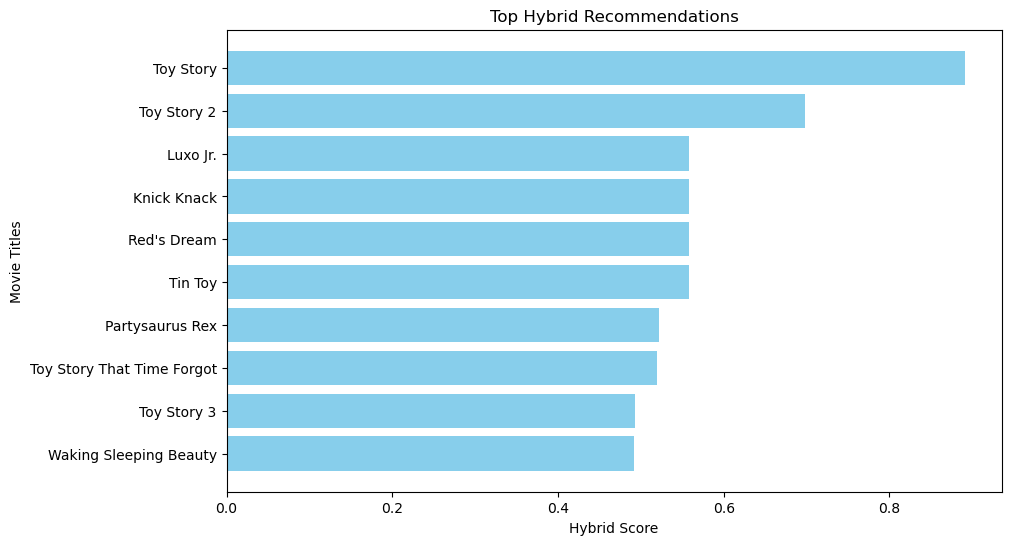

In [121]:
import matplotlib.pyplot as plt

def visualize_recommendations(recommendations):
    # Sıralı olarak en iyi öneriler ve skorları
    titles = recommendations['title']
    hybrid_scores = recommendations['hybrid_score']

    plt.figure(figsize=(10, 6))
    plt.barh(titles, hybrid_scores, color='skyblue')
    plt.xlabel('Hybrid Score')
    plt.ylabel('Movie Titles')
    plt.title('Top Hybrid Recommendations')
    plt.gca().invert_yaxis()  # En yüksek skor yukarıda gösterilir
    plt.show()

# Görselleştirme
visualize_recommendations(recommendations)


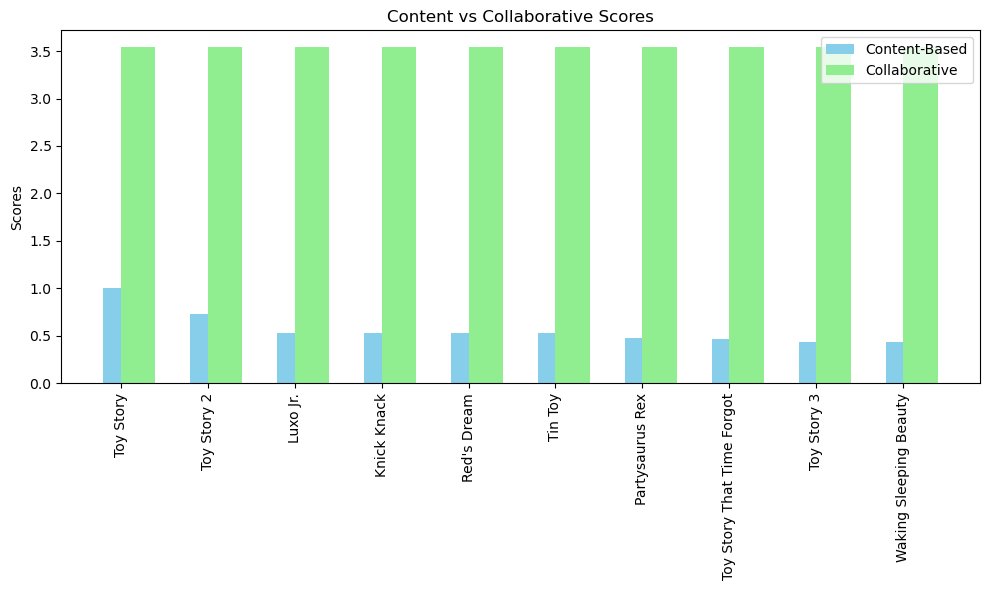

In [122]:
def compare_scores(recommendations):
    titles = recommendations['title']
    content_scores = recommendations['content_similarity']
    collaborative_scores = recommendations['collaborative_score']

    x = range(len(titles))

    plt.figure(figsize=(10, 6))
    plt.bar(x, content_scores, width=0.4, label='Content-Based', color='skyblue', align='center')
    plt.bar(x, collaborative_scores, width=0.4, label='Collaborative', color='lightgreen', align='edge')
    plt.xticks(x, titles, rotation=90)
    plt.ylabel('Scores')
    plt.title('Content vs Collaborative Scores')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Görselleştirme
compare_scores(recommendations)


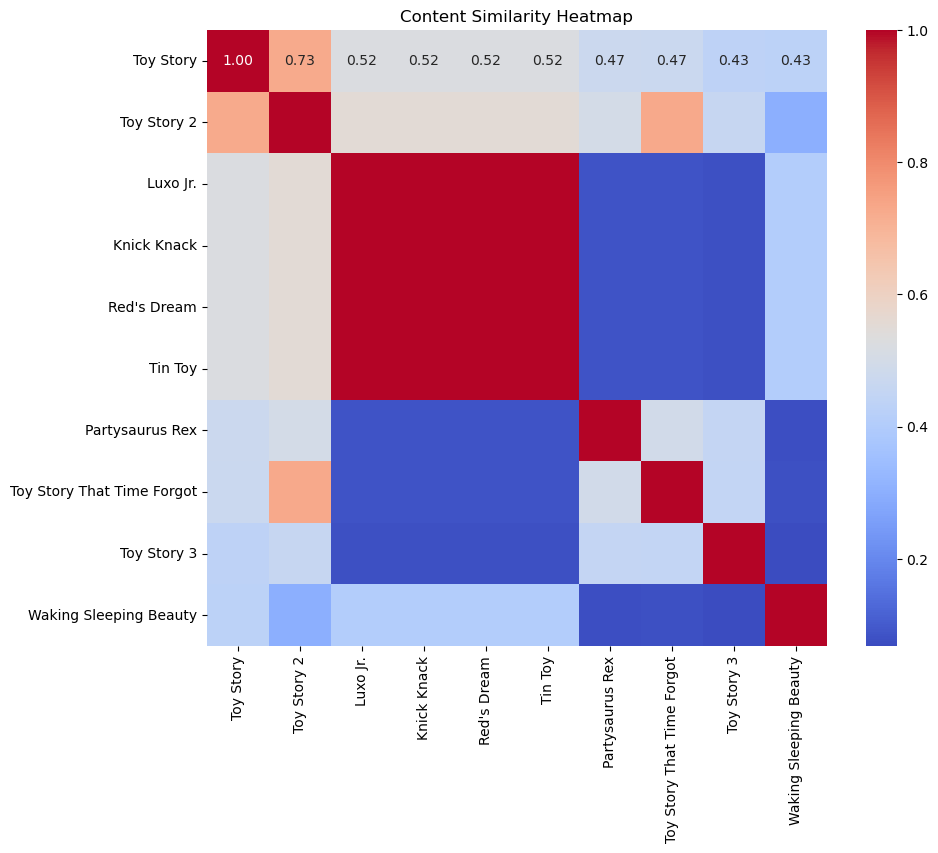

In [123]:
import seaborn as sns
import numpy as np

def plot_similarity_heatmap(recommendations, tfidf_matrix, movies_df):
    indices = recommendations.index
    sim_matrix = tfidf_matrix[indices].toarray()
    similarity = np.dot(sim_matrix, sim_matrix.T)

    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=recommendations['title'], yticklabels=recommendations['title'])
    plt.title('Content Similarity Heatmap')
    plt.show()

# Görselleştirme
plot_similarity_heatmap(recommendations, tfidf_matrix, movies)
